# Project Title: Telecom Churn Analysis
## Introduction
### Import important libraries 

In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import plotly.express as px
import seaborn as sns


## Import and pre_processing the data

In [2]:
df=pd.read_csv("telecome_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.dropna(inplace=True)

# Drop columns with missing values
df.dropna(axis=1, inplace=True)

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
if df.duplicated().sum() > 0:
        print("Warning: Duplicates found.")

In [10]:
df["customerID"].nunique()

7043

In [11]:
df = df.drop(columns=['customerID'])

In [12]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df['Churn'] = encoder.fit_transform(df[['Churn']])

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0.0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0.0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1.0


### Data Exploration
### We will perform exploratory data analysis (EDA) to understand the dataset.


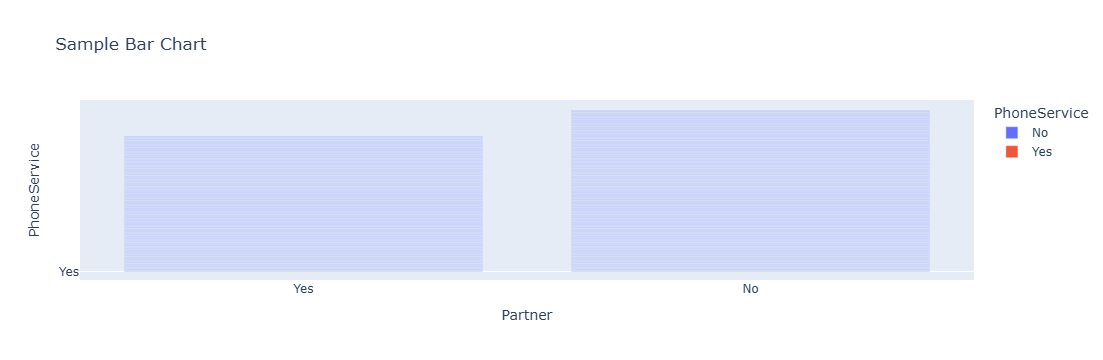

In [21]:
fig = px.bar(df, x="Partner", y="PhoneService",color="PhoneService", title="Sample Bar Chart")
fig.show()

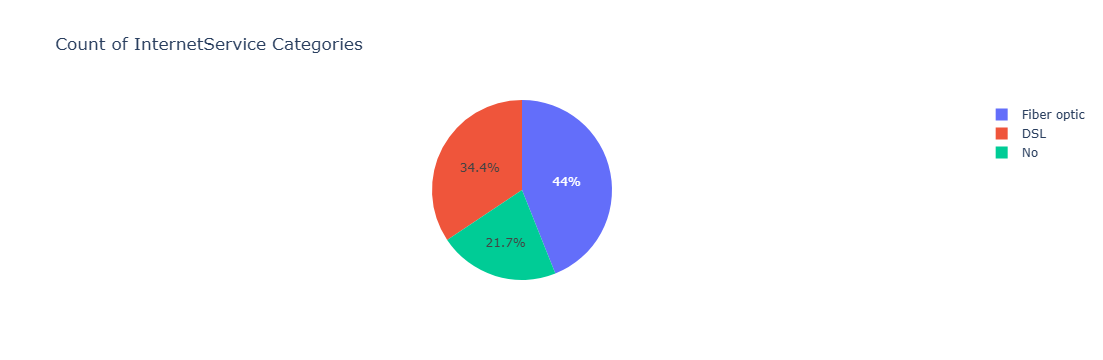

In [53]:
counts = df['InternetService'].value_counts().reset_index()
counts.columns = ['InternetService', 'Count']
fig = px.pie(counts,values='Count',names='InternetService', color='InternetService', title='Count of InternetService Categories')
fig.show()

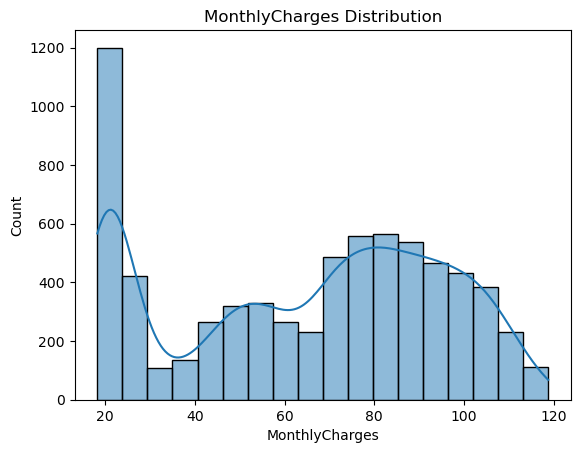

In [75]:
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("MonthlyCharges Distribution")
plt.show()

C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\467389916.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




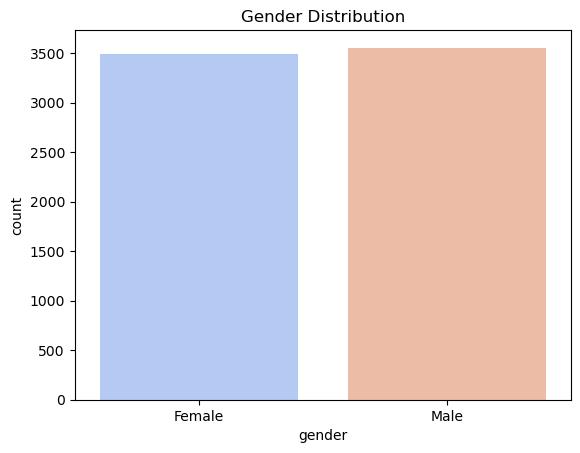

In [30]:
sns.countplot(x='gender', data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\2789934837.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




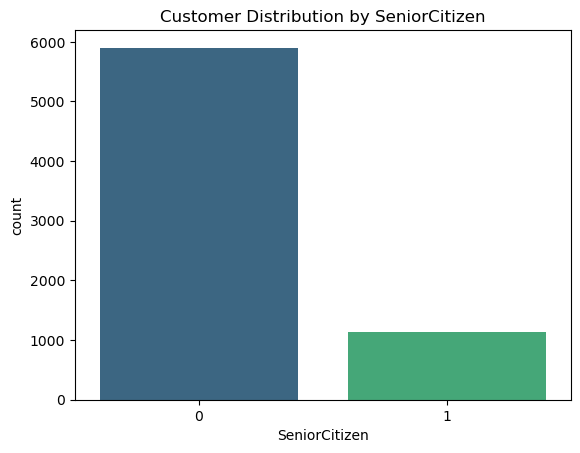

In [36]:
sns.countplot(x='SeniorCitizen', data=df,palette='viridis')
plt.title("Customer Distribution by SeniorCitizen")
plt.show()

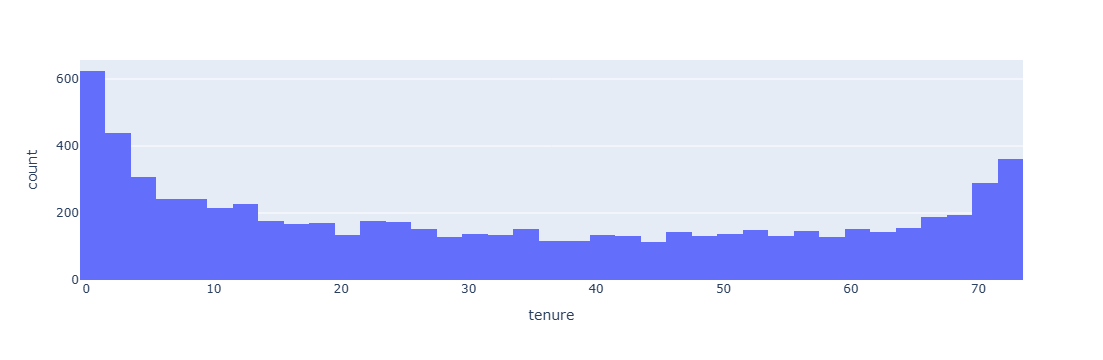

In [32]:
fig2 = px.histogram(df, x="tenure")
fig2.show()

C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1540952644.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1540952644.py:4: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



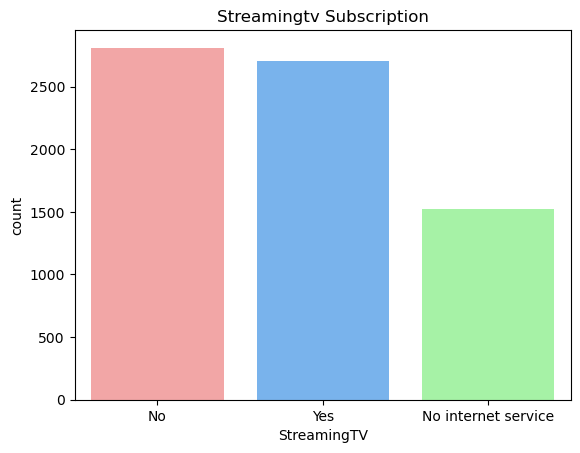

C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1540952644.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1540952644.py:4: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



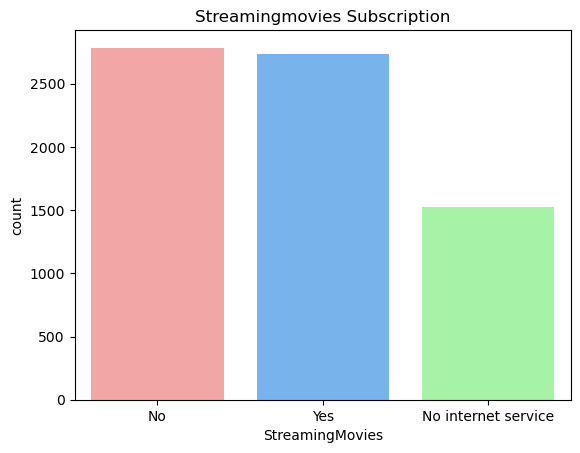

C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1540952644.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1540952644.py:4: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



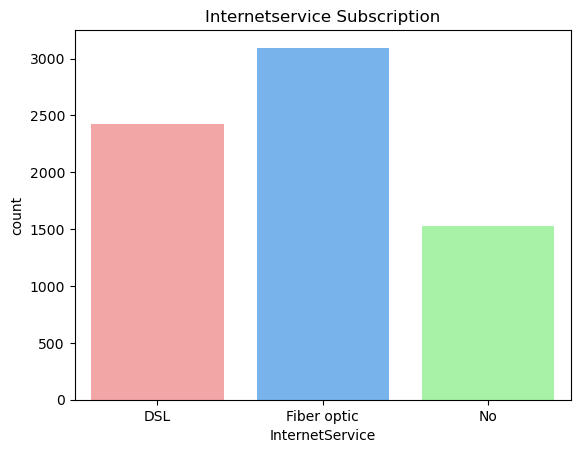

In [39]:
services = ["StreamingTV","StreamingMovies","InternetService"]
custom_palette = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
for service in services:
    sns.countplot(x=service, data=df,palette=custom_palette)
    plt.title(f"{service.capitalize()} Subscription")
    plt.show()

C:\Users\NadaNasserMahmodEiss\AppData\Local\Temp\ipykernel_14328\1144273299.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




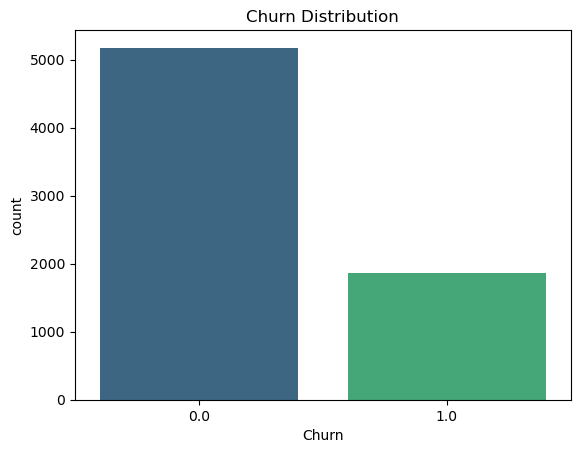

In [38]:
sns.countplot(x='Churn', data=df,palette='viridis')
plt.title("Churn Distribution")
plt.show()

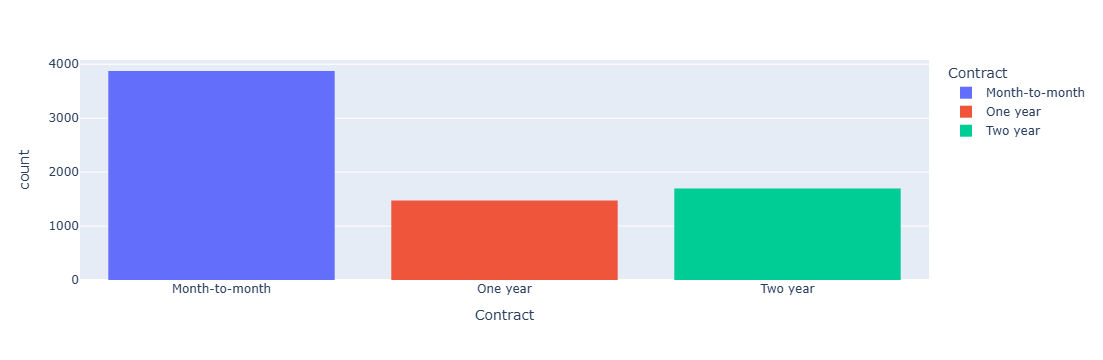

In [40]:
fig3 = px.histogram(df, x='Contract',color='Contract')
fig3.show()

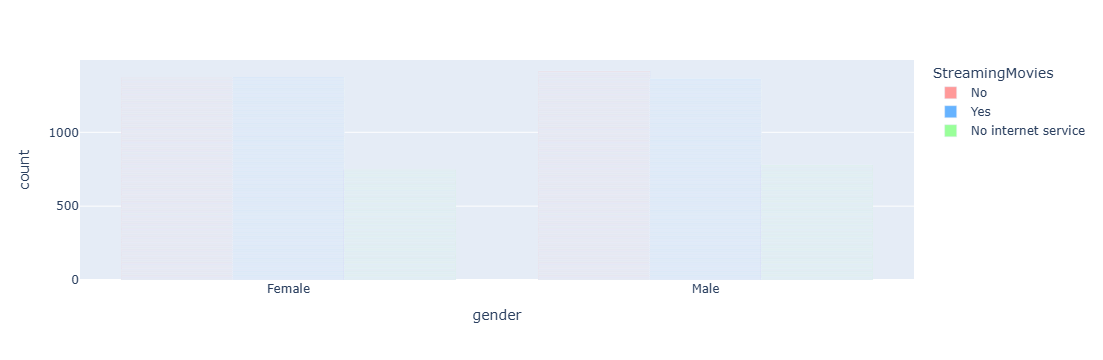

In [49]:
fig = px.bar(df,x="gender",color="StreamingMovies",color_discrete_sequence=custom_palette, barmode="group")
fig.show()

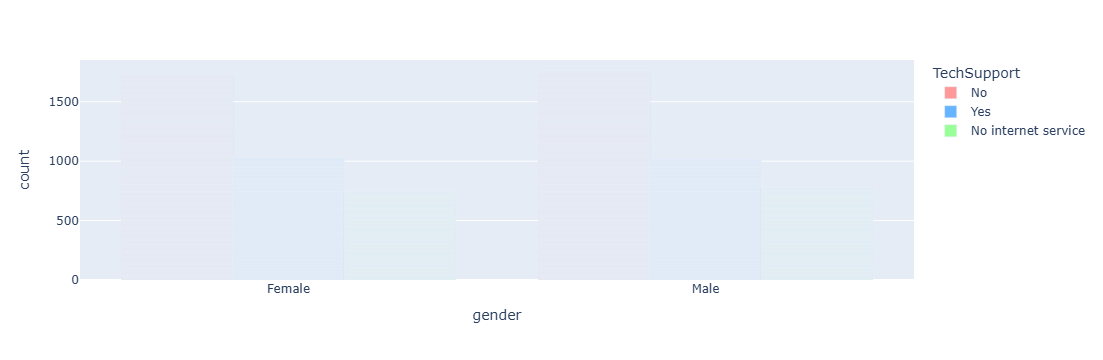

In [48]:
fig = px.bar(df,x="gender",color="TechSupport",  color_discrete_sequence=custom_palette, barmode="group")
fig.show()